In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('train.csv')

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Taking specific column to calculate the required fields

In [9]:
data= df[['LotFrontage','LotArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','SalePrice']]
data.head(10)  

,LotFrontage,LotArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,SalePrice
0,65.0,8450,1,0,2,1,3,208500
1,80.0,9600,0,1,2,0,3,181500
2,68.0,11250,1,0,2,1,3,223500
3,60.0,9550,1,0,1,0,3,140000
4,84.0,14260,1,0,2,1,4,250000
5,85.0,14115,1,0,1,1,1,143000
6,75.0,10084,1,0,2,0,3,307000
7,NaN,10382,1,0,2,1,3,200000
8,51.0,6120,0,0,2,0,2,129900
9,50.0,7420,1,0,1,0,2,118000


In [10]:
data.describe()

,LotFrontage,LotArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,0.425342,0.057534,1.565068,0.382877,2.866438,180921.195890
std,24.284752,9981.264932,0.518911,0.238753,0.550916,0.502885,0.815778,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.000000,7553.500000,0.000000,0.000000,1.000000,0.000000,2.000000,129975.000000
50%,69.000000,9478.500000,0.000000,0.000000,2.000000,0.000000,3.000000,163000.000000
75%,80.000000,11601.500000,1.000000,0.000000,2.000000,1.000000,3.000000,214000.000000
max,313.000000,215245.000000,3.000000,2.000000,3.000000,2.000000,8.000000,755000.000000


In [11]:
data.corr()  

,LotFrontage,LotArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,SalePrice
LotFrontage,1.000000,0.426095,0.100949,-0.007234,0.198769,0.053532,0.263170,0.351799
LotArea,0.426095,1.000000,0.158155,0.048046,0.126031,0.014259,0.119690,0.263843
BsmtFullBath,0.100949,0.158155,1.000000,-0.147871,-0.064512,-0.030905,-0.150673,0.227122
BsmtHalfBath,-0.007234,0.048046,-0.147871,1.000000,-0.054536,-0.012340,0.046519,-0.016844
FullBath,0.198769,0.126031,-0.064512,-0.054536,1.000000,0.136381,0.363252,0.560664
HalfBath,0.053532,0.014259,-0.030905,-0.012340,0.136381,1.000000,0.226651,0.284108
BedroomAbvGr,0.263170,0.119690,-0.150673,0.046519,0.363252,0.226651,1.000000,0.168213
SalePrice,0.351799,0.263843,0.227122,-0.016844,0.560664,0.284108,0.168213,1.000000


In [12]:
data.isnull().sum()

LotFrontage     259
LotArea           0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
SalePrice         0
dtype: int64

In [13]:
(data['SalePrice']==0).sum()

0

In [14]:
data['bathroom']=data['BsmtFullBath']+data['BsmtHalfBath']+data['FullBath']+data['HalfBath']

C:\Users\Atharva\AppData\Local\Temp\ipykernel_13076\2721952955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bathroom']=data['BsmtFullBath']+data['BsmtHalfBath']+data['FullBath']+data['HalfBath']


In [15]:
data.head(10)

,LotFrontage,LotArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,SalePrice,bathroom
0,65.0,8450,1,0,2,1,3,208500,4
1,80.0,9600,0,1,2,0,3,181500,3
2,68.0,11250,1,0,2,1,3,223500,4
3,60.0,9550,1,0,1,0,3,140000,2
4,84.0,14260,1,0,2,1,4,250000,4
5,85.0,14115,1,0,1,1,1,143000,3
6,75.0,10084,1,0,2,0,3,307000,3
7,NaN,10382,1,0,2,1,3,200000,4
8,51.0,6120,0,0,2,0,2,129900,2
9,50.0,7420,1,0,1,0,2,118000,2


In [16]:
data= data[['LotArea','bathroom','BedroomAbvGr','SalePrice']]
data

,LotArea,bathroom,BedroomAbvGr,SalePrice
0,8450,4,3,208500
1,9600,3,3,181500
2,11250,4,3,223500
3,9550,2,3,140000
4,14260,4,4,250000
...,...,...,...,...
1455,7917,3,3,175000
1456,13175,3,3,210000
1457,9042,2,4,266500
1458,9717,2,2,142125


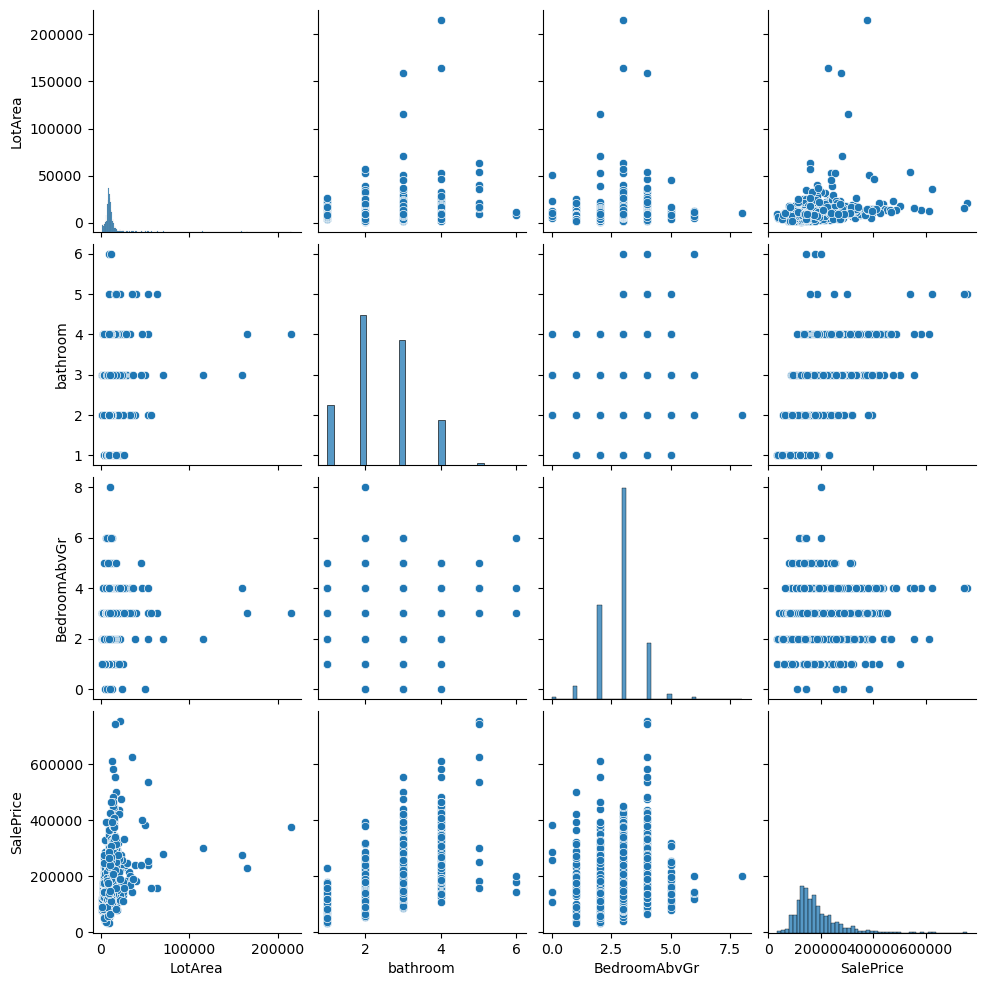

In [17]:
pairplot = sns.pairplot(data)

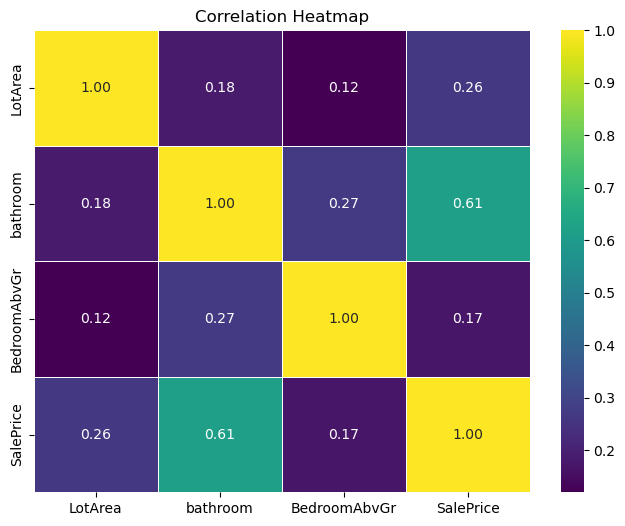

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), 
            annot=True, 
            cmap='viridis',  
            fmt=".2f", 
            linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [23]:
X= data.drop('SalePrice', axis= 1)
y= data['SalePrice']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [25]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2,random_state= 42)

In [26]:
linear_reg_model= LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [28]:
footage= float(input('enter the square area footage of the house:'))
bathrooms= float(input('enter the no. of bathrooms in the house:'))
rooms= float(input('enter the no.of rooma in the house:'))
input_data= pd.DataFrame([[footage, bathrooms, rooms]], columns= X_train.columns)

predicted_price= linear_reg_model.predict(input_data)

enter the square area footage of the house:4
enter the no. of bathrooms in the house:4
enter the no.of rooma in the house:4


In [29]:
predicted_price

array([243598.22080345])